In [43]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda w, x: w[0] + w[1]*x + w[2]*(x**2) + w[3]*(x**3)
dom = np.linspace(-2, 2, 20)
w = np.array([1, -0.001, 0.001, -1])

val = f(w, dom) + np.random.randn(20)/2
val_truth = f(w, dom)

In [44]:
samples = np.linspace(-2, 2, 10)
noise = f(w, samples) + np.random.randn(10)/2

y = np.transpose(np.expand_dims(noise, axis=0), (1, 0))
X = np.vander((samples), 4, 'true')


print(y)
print(X)

beta_hat = np.linalg.inv(np.transpose(X, (1, 0)).dot(X)).dot(np.transpose(X, (1, 0))).dot(y)
learned_values = f(beta_hat, samples) 

[[ 8.50305645]
 [ 5.19582315]
 [ 2.1515753 ]
 [ 1.3432599 ]
 [ 0.07875733]
 [ 0.7093212 ]
 [ 0.75974965]
 [-0.86710836]
 [-2.66933975]
 [-7.29570959]]
[[ 1.         -2.          4.         -8.        ]
 [ 1.         -1.55555556  2.41975309 -3.76406036]
 [ 1.         -1.11111111  1.2345679  -1.37174211]
 [ 1.         -0.66666667  0.44444444 -0.2962963 ]
 [ 1.         -0.22222222  0.04938272 -0.01097394]
 [ 1.          0.22222222  0.04938272  0.01097394]
 [ 1.          0.66666667  0.44444444  0.2962963 ]
 [ 1.          1.11111111  1.2345679   1.37174211]
 [ 1.          1.55555556  2.41975309  3.76406036]
 [ 1.          2.          4.          8.        ]]


Text(0.5, 1.0, 'Noisy samples and ground truth function')

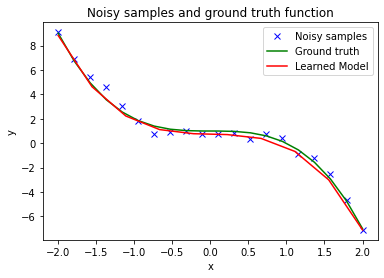

In [45]:
# plot
fig, ax = plt.subplots(1, 1)

ax.plot(dom, val, 'bx')
ax.plot(dom, val_truth, '-g')
ax.plot(samples, learned_values, '-r')

ax.legend(('Noisy samples', 'Ground truth', 'Learned Model'))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Noisy samples and ground truth function')